In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("해보자.csv",encoding='euc=kr')
df.columns

Index(['일자', '도매가격.원.kg.', '생산량..톤.', '10a당.생산량.톤', '평균기온..C.', '일강수량.mm.',
       '평균.풍속.m.s.', '합계.일조시간.hr.', '평균.지면온도..C.', '평균.5cm.지중온도..C.'],
      dtype='object')

Text(0, 0.5, 'price')

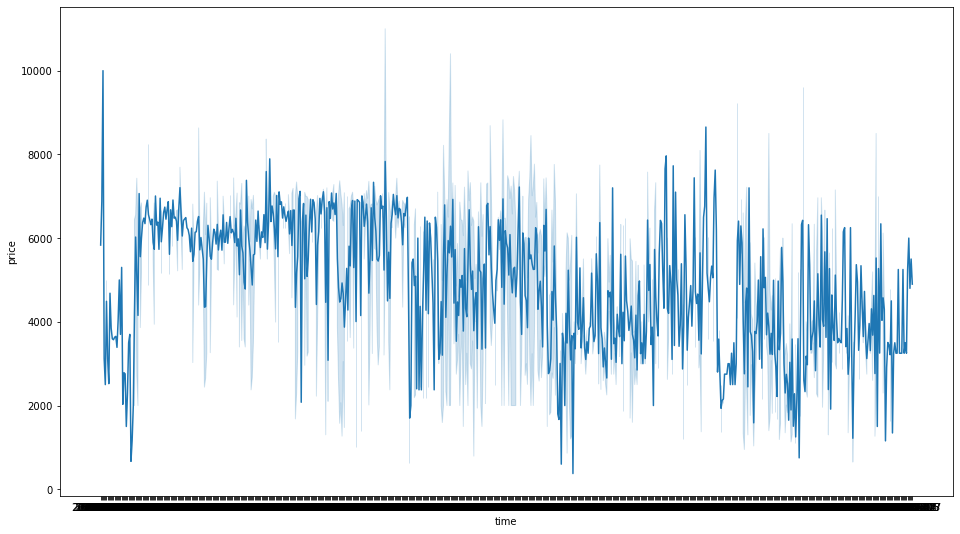

In [3]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['도매가격.원.kg.'], x=df['일자'])
plt.xlabel('time')
plt.ylabel('price')

## 데이터 정규화
### 모델이 학습을 잘하기 위해서 데이터 정규화 실시

In [6]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['도매가격.원.kg.', '생산량..톤.', '10a당.생산량.톤', '평균기온..C.', '일강수량.mm.',
       '평균.풍속.m.s.', '합계.일조시간.hr.', '평균.지면온도..C.', '평균.5cm.지중온도..C.']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,도매가격.원.kg.,생산량..톤.,10a당.생산량.톤,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
0,0.513694,0.911133,0.077966,0.965995,0.219921,0.348630,0.916239,0.891494,0.956213
1,0.611765,0.911133,0.077966,0.964970,0.219921,0.336986,0.919658,0.889744,0.954271
2,0.905882,0.911133,0.077966,0.942794,0.245262,0.223973,0.895916,0.886164,0.952019
3,0.258824,0.911133,0.077966,0.749476,0.255881,0.116438,0.361443,0.669017,0.741266
4,0.200000,0.000000,0.179661,0.985611,0.592953,0.052055,0.802849,0.951440,0.979066
...,...,...,...,...,...,...,...,...,...
1347,0.482353,1.000000,1.000000,0.828964,0.641978,0.197945,0.326686,0.819677,0.834419
1348,0.463529,1.000000,1.000000,0.939444,0.604003,0.186986,0.420133,0.935209,0.942932
1349,0.425882,1.000000,1.000000,0.918822,0.613347,0.197945,0.419373,0.915882,0.925116
1350,0.458353,1.000000,1.000000,0.814255,0.495434,0.579452,0.715480,0.803661,0.800317


In [ ]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
TEST_SIZE = 946
WINDOW_SIZE = 365

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size=365):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['생산량..톤.', '평균기온..C.', '일강수량.mm.',
       '평균.풍속.m.s.', '합계.일조시간.hr.', '평균.5cm.지중온도..C.']
label_cols = ['도매가격.원.kg.']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((308, 20, 6), (78, 20, 6))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((946, 6), (946, 1))

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((926, 20, 6), (926, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
20/20 [==============================] - 2s 27ms/step - loss: 0.2141 - val_loss: 0.0440

Epoch 00001: val_loss improved from inf to 0.04396, saving model to model\tmp_checkpoint.h5
Epoch 2/200
20/20 [==============================] - 0s 13ms/step - loss: 0.0399 - val_loss: 0.0391

Epoch 00002: val_loss improved from 0.04396 to 0.03913, saving model to model\tmp_checkpoint.h5
Epoch 3/200
20/20 [==============================] - 0s 10ms/step - loss: 0.0260 - val_loss: 0.0362

Epoch 00003: val_loss improved from 0.03913 to 0.03624, saving model to model\tmp_checkpoint.h5
Epoch 4/200
20/20 [==============================] - 0s 9ms/step - loss: 0.0222 - val_loss: 0.0290

Epoch 00004: val_loss improved from 0.03624 to 0.02903, saving model to model\tmp_checkpoint.h5
Epoch 5/200
20/20 [==============================] - 0s 9ms/step - loss: 0.0202 - val_loss: 0.0284

Epoch 00005: val_loss improved from 0.02903 to 0.02838, saving model to model\tmp_checkpoint.h5
Epoch 6/200
20/20 [==

### epoch 25번 기준으로 0.02541의 평균오차를 확인

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(926, 1)

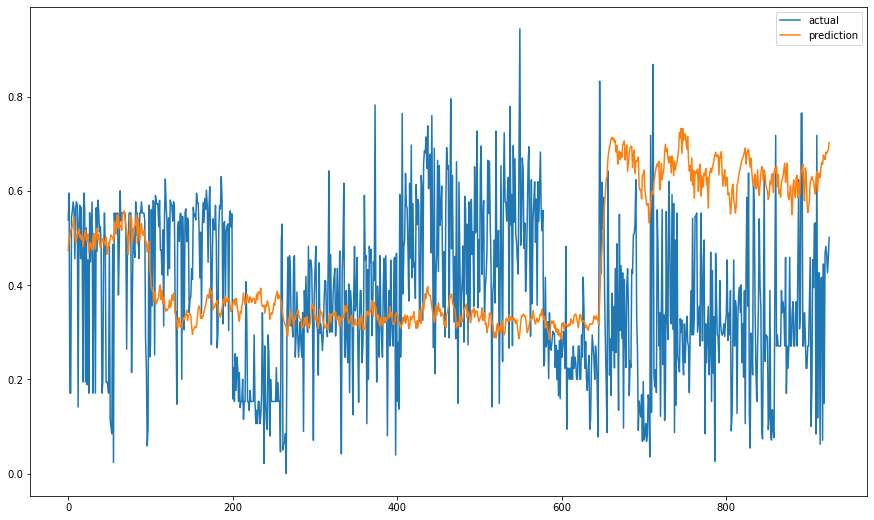

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
